
# <center>EDA - Problem Statement</center>


# Problem - 1

1. Import Python packages that may be useful for examining a given dataset, and set plot style as `searborn-darkgrid`.
2. Import `tips.csv` dataset and print the size and the first five observations of the dataset
3. Determine which of the provided attributes are categorical and which are quantitative. (Hint: use `dtypes`)
4. Use the parameter **total_bill** to compute the following summary statistics:
    - Mean
    - Median
    - Standard Deviation
    - Range
    - The Interquartile Range
        
5. Determine the number of outliers in the observation using the parameter from Question 4.

# Problem - 2 

You are given two datasets:

- **employees.csv** - This dataset contains information about employees in a company. The columns are:
    - EmployeeID
    - Name
    - Department
    - Salary
<br>
- **sales.csv** - This dataset contains information about sales transactions. The columns are:
    - TransactionID
    - EmployeeID
    - ProductID
    - Quantity
    - TransactionDate<br>
<br>
1. Import the datasets `employees.csv` and `sales.csv` into Pandas DataFrames.

2. Merge the two DataFrames using an appropriate type of join to include all sales transactions and their corresponding employee information.

3. Clean the merged dataset by:

  - Removing duplicates
  - Filling or dropping any missing values


4. Create a new column called `RevenueGenerated` which is a product of a hypothetical `ProductPrice` column and the `Quantity` column. Assume that the ProductPrice for ProductID 1 is `$20`, for ProductID 2 is `$15`, and for ProductID 3 is `$30`.

5. Group the data to answer the following questions:

  - What is the total revenue generated by each department?
  - Who are the top 5 employees in terms of revenue generated?
  - What is the monthly revenue trend in the company?

6. Export the cleaned and transformed dataset to a new CSV file called `employee_sales_summary.csv`. 


In [95]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# size and first 5 records
df = pd.read_csv('tips.csv')
# len(df)
print(len(df))
df.head()

244


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [97]:
# Determine the type of variable 
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [98]:
# Summary Statistics
print("\nSummary statistics:")
df['total_bill'].describe()


Summary statistics:


count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

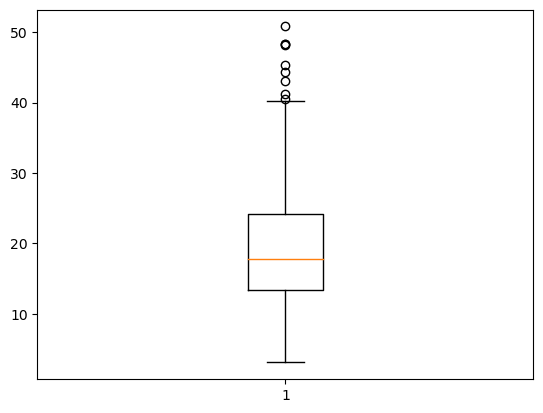

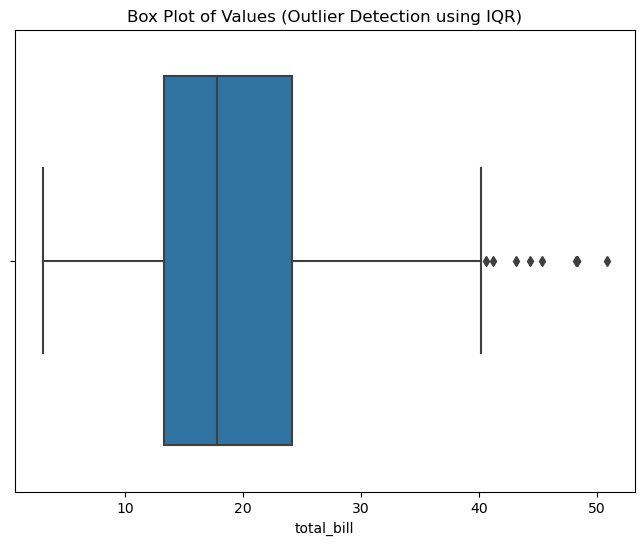

Outliers:
     total_bill    tip     sex smoker   day    time  size  Is_Outlier
59        48.27   6.73    Male     No   Sat  Dinner     4        True
102       44.30   2.50  Female    Yes   Sat  Dinner     3        True
142       41.19   5.00    Male     No  Thur   Lunch     5        True
156       48.17   5.00    Male     No   Sun  Dinner     6        True
170       50.81  10.00    Male    Yes   Sat  Dinner     3        True
182       45.35   3.50    Male    Yes   Sun  Dinner     3        True
184       40.55   3.00    Male    Yes   Sun  Dinner     2        True
197       43.11   5.00  Female    Yes  Thur   Lunch     4        True
212       48.33   9.00    Male     No   Sat  Dinner     4        True


In [99]:
#Determine number of outliers
plt.boxplot(df['total_bill'])
plt.show

Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5 * IQR

# Identify and mark outliers
df['Is_Outlier'] = (df['total_bill'] < (Q1 - threshold)) | (df['total_bill'] > (Q3 + threshold))

# Visualize the data and outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='total_bill')
plt.title('Box Plot of Values (Outlier Detection using IQR)')
plt.show()

# Print the outliers
outliers = df[df['Is_Outlier']]
print("Outliers:")
print(outliers)

In [100]:
#Problem 2

In [101]:
#import datasets
employee = pd.read_csv('employees.csv')
sales = pd.read_csv('sales.csv')

In [102]:
#merge dataframes using appropriate join
employee_sales = pd.merge(sales, employee, how='left', left_on='EmployeeID', right_on='EmployeeID')
employee_sales.head()

,TransactionID,EmployeeID,ProductID,Quantity,TransactionDate,Name,Department,Salary
0,1,2.0,1,5,2023-01-10,Bob,Sales,50000.0
1,1,2.0,1,5,2023-01-10,Bob,Sales,50000.0
2,2,2.0,3,2,2023-01-12,Bob,Sales,50000.0
3,3,4.0,2,3,2023-01-15,Dave,Engineering,62000.0
4,4,7.0,1,4,2023-01-20,Grace,Sales,49000.0


In [103]:
#clean merged datasets
#remove duplicates

employee_sales.drop_duplicates(inplace=True)
employee_sales.isnull().sum()

# drop missing values
employee_sales = employee_sales.dropna()

In [104]:
#revenue generated

ProductPrice = pd.DataFrame({'ProductID': [1, 2, 3], 'ProductPrice': [20, 15, 30]})
ProductPrice.head()
employee_sales = employee_sales.merge(ProductPrice, on='ProductID')
employee_sales['RevenueGenerated'] = employee_sales['Quantity'] * employee_sales['ProductPrice']
employee_sales.head(10)

,TransactionID,EmployeeID,ProductID,Quantity,TransactionDate,Name,Department,Salary,ProductPrice,RevenueGenerated
0,1,2.0,1,5,2023-01-10,Bob,Sales,50000.0,20,100
1,4,7.0,1,4,2023-01-20,Grace,Sales,49000.0,20,80
2,6,10.0,1,6,2023-02-01,Jack,Sales,53000.0,20,120
3,8,6.0,1,2,2023-02-10,Frank,Engineering,63000.0,20,40
4,2,2.0,3,2,2023-01-12,Bob,Sales,50000.0,30,60
5,7,1.0,3,5,2023-02-05,Alice,Engineering,60000.0,30,150
6,10,5.0,3,1,2023-02-20,Eve,Human Resources,48000.0,30,30
7,3,4.0,2,3,2023-01-15,Dave,Engineering,62000.0,15,45
8,5,3.0,2,1,2023-01-25,Charlie,Marketing,55000.0,15,15
9,9,8.0,2,3,2023-02-12,Hank,Marketing,52000.0,15,45


In [105]:
# Create a new column called RevenueGenerated which is a product of a hypothetical ProductPrice column and the Quantity column. 
# Assume that the ProductPrice for ProductID 1 is $20, for ProductID 2 is $15, and for ProductID 3 is $30.

employee_sales['RevenueGenerated'] = employee_sales['Quantity'] * employee_sales['ProductPrice']
employee_sales.head(10)

,TransactionID,EmployeeID,ProductID,Quantity,TransactionDate,Name,Department,Salary,ProductPrice,RevenueGenerated
0,1,2.0,1,5,2023-01-10,Bob,Sales,50000.0,20,100
1,4,7.0,1,4,2023-01-20,Grace,Sales,49000.0,20,80
2,6,10.0,1,6,2023-02-01,Jack,Sales,53000.0,20,120
3,8,6.0,1,2,2023-02-10,Frank,Engineering,63000.0,20,40
4,2,2.0,3,2,2023-01-12,Bob,Sales,50000.0,30,60
5,7,1.0,3,5,2023-02-05,Alice,Engineering,60000.0,30,150
6,10,5.0,3,1,2023-02-20,Eve,Human Resources,48000.0,30,30
7,3,4.0,2,3,2023-01-15,Dave,Engineering,62000.0,15,45
8,5,3.0,2,1,2023-01-25,Charlie,Marketing,55000.0,15,15
9,9,8.0,2,3,2023-02-12,Hank,Marketing,52000.0,15,45


In [106]:
employee_sales.head()

,TransactionID,EmployeeID,ProductID,Quantity,TransactionDate,Name,Department,Salary,ProductPrice,RevenueGenerated
0,1,2.0,1,5,2023-01-10,Bob,Sales,50000.0,20,100
1,4,7.0,1,4,2023-01-20,Grace,Sales,49000.0,20,80
2,6,10.0,1,6,2023-02-01,Jack,Sales,53000.0,20,120
3,8,6.0,1,2,2023-02-10,Frank,Engineering,63000.0,20,40
4,2,2.0,3,2,2023-01-12,Bob,Sales,50000.0,30,60


In [107]:
# Group the data to answer the following questions:

# What is the total revenue generated by each department?
revenue_dept = employee_sales.groupby('Department')['RevenueGenerated'].sum().reset_index()
revenue_dept.head(10)

,Department,RevenueGenerated
0,Engineering,235
1,Human Resources,30
2,Marketing,60
3,Sales,360


In [108]:
# Who are the top 5 employees in terms of revenue generated?
top_5 = employee_sales.sort_values(by='RevenueGenerated', ascending = False)
top_5[['EmployeeID', 'Name', 'RevenueGenerated']].head(5)

,EmployeeID,Name,RevenueGenerated
5,1.0,Alice,150
2,10.0,Jack,120
0,2.0,Bob,100
1,7.0,Grace,80
4,2.0,Bob,60


   month  RevenueGenerated
0      1               300
1      2               385


<function matplotlib.pyplot.show(close=None, block=None)>

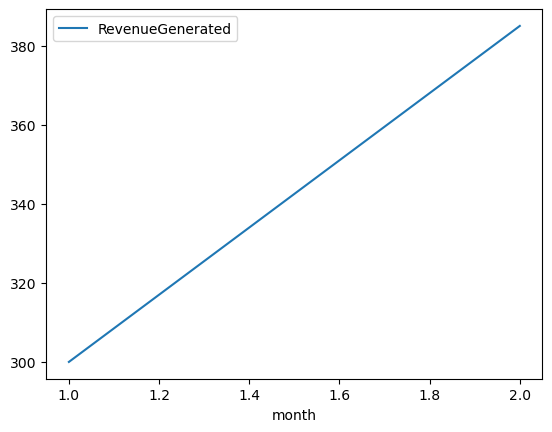

In [109]:
# What is the monthly revenue trend in the company?

employee_sales['TransactionDate'] = pd.to_datetime(employee_sales['TransactionDate'])
employee_sales['month'] = employee_sales['TransactionDate'].dt.month
employee_sales.head()
revenue = employee_sales.groupby('month')['RevenueGenerated'].sum().reset_index()
print(revenue)

revenue.plot(x='month', y='RevenueGenerated')
plt.show

In [110]:
employee_sales

,TransactionID,EmployeeID,ProductID,Quantity,TransactionDate,Name,Department,Salary,ProductPrice,RevenueGenerated,month
0,1,2.0,1,5,2023-01-10,Bob,Sales,50000.0,20,100,1
1,4,7.0,1,4,2023-01-20,Grace,Sales,49000.0,20,80,1
2,6,10.0,1,6,2023-02-01,Jack,Sales,53000.0,20,120,2
3,8,6.0,1,2,2023-02-10,Frank,Engineering,63000.0,20,40,2
4,2,2.0,3,2,2023-01-12,Bob,Sales,50000.0,30,60,1
5,7,1.0,3,5,2023-02-05,Alice,Engineering,60000.0,30,150,2
6,10,5.0,3,1,2023-02-20,Eve,Human Resources,48000.0,30,30,2
7,3,4.0,2,3,2023-01-15,Dave,Engineering,62000.0,15,45,1
8,5,3.0,2,1,2023-01-25,Charlie,Marketing,55000.0,15,15,1
9,9,8.0,2,3,2023-02-12,Hank,Marketing,52000.0,15,45,2


In [111]:
df.to_csv('employee_sales_summary.csv', index=False)